In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.utils import np_utils
from keras import backend as K

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [11]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))

model.add(SimpleRNN(64))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 28, 128)           20096     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 34,858
Trainable params: 34,858
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
hist = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 88s 1ms/step - loss: 0.4404 - acc: 0.8687 - val_loss: 0.2186 - val_acc: 0.9359
Epoch 2/2
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2039 - acc: 0.9481 - val_loss: 0.1481 - val_acc: 0.9588


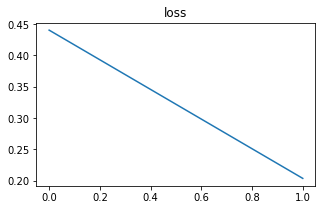

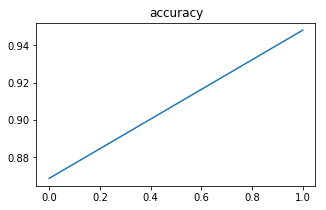

In [13]:
plt.figure(figsize=(5,3))
plt.plot(hist.epoch,hist.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(hist.epoch,hist.history['acc'])
plt.title('accuracy');